# Desafío 1: Lectura de archivos

In [1]:
# Importe las librerías necesarias para el análisis factorial siguiendo las convenciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import factor_analyzer as fact 
import missingno as msngo
import warnings
warnings.filterwarnings(action='ignore')

plt.style.use('seaborn-whitegrid') # gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (10, 6) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 200 # resolución gráficos

In [2]:
# Importe la base de datos bfi.csv y asígnela a un objeto df.
df = pd.read_csv('bfi.csv')

In [3]:
# Solicite las primeras 5 observaciones con head.
df.head(5)

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


# Desafío 2: Preprocesamiento

In [4]:
# Elimine las columnas redundantes de la base, tal como 'Unnamed: 0'.
df = df.drop('Unnamed: 0', axis = 1)

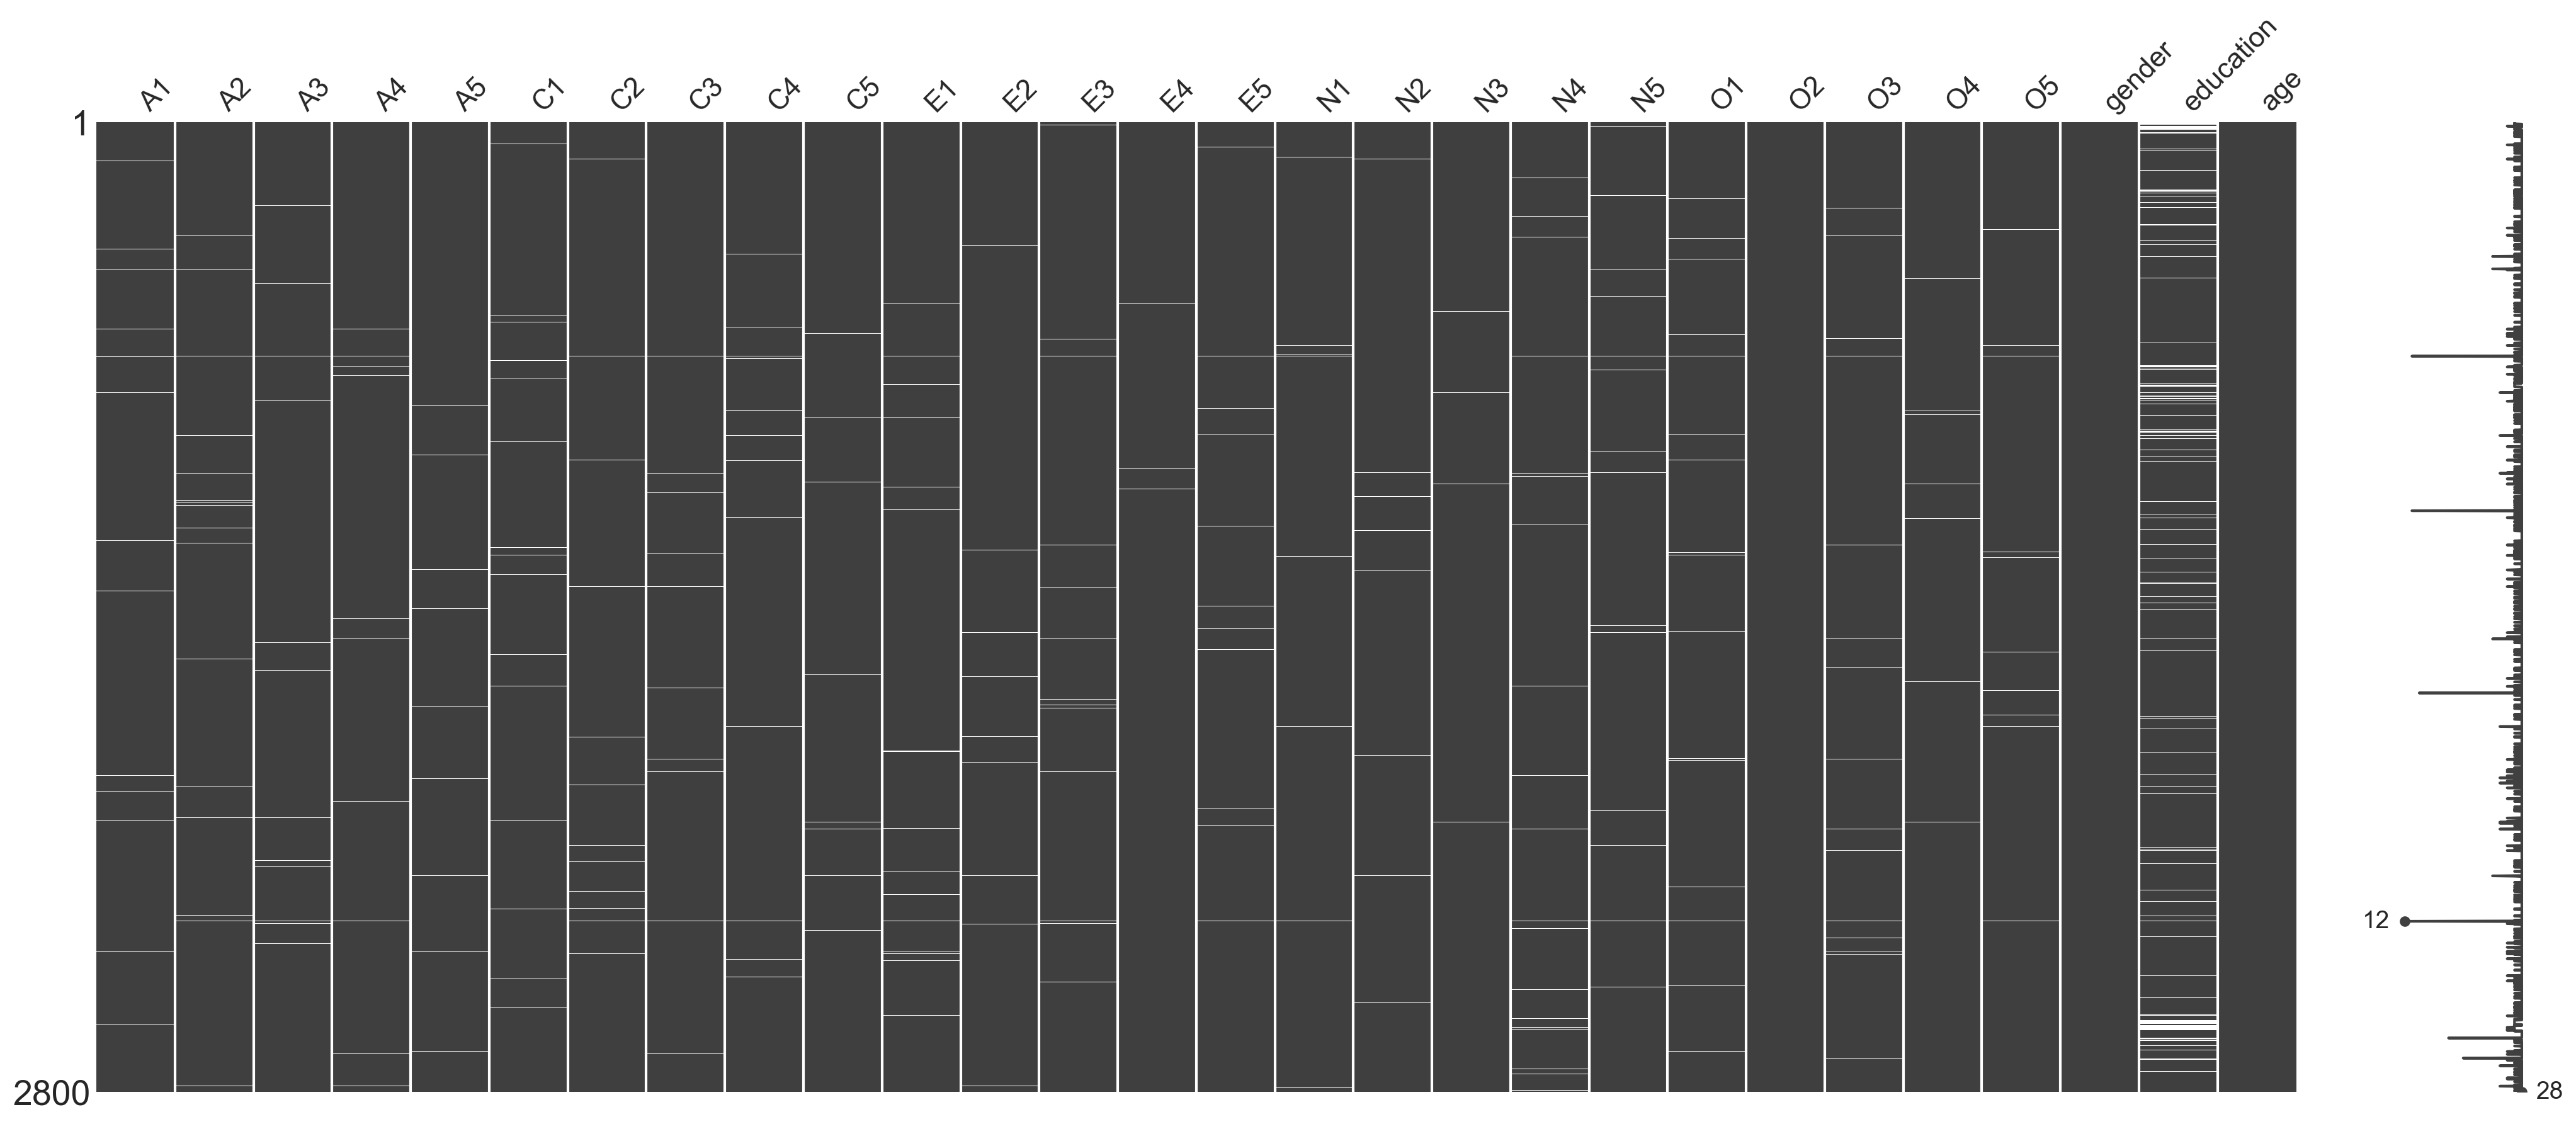

In [5]:
# Analice el patrón de datos perdidos con missingno. Comente cuáles son las principales variables con mayores tasas de valores perdidos.
msngo.matrix(df);

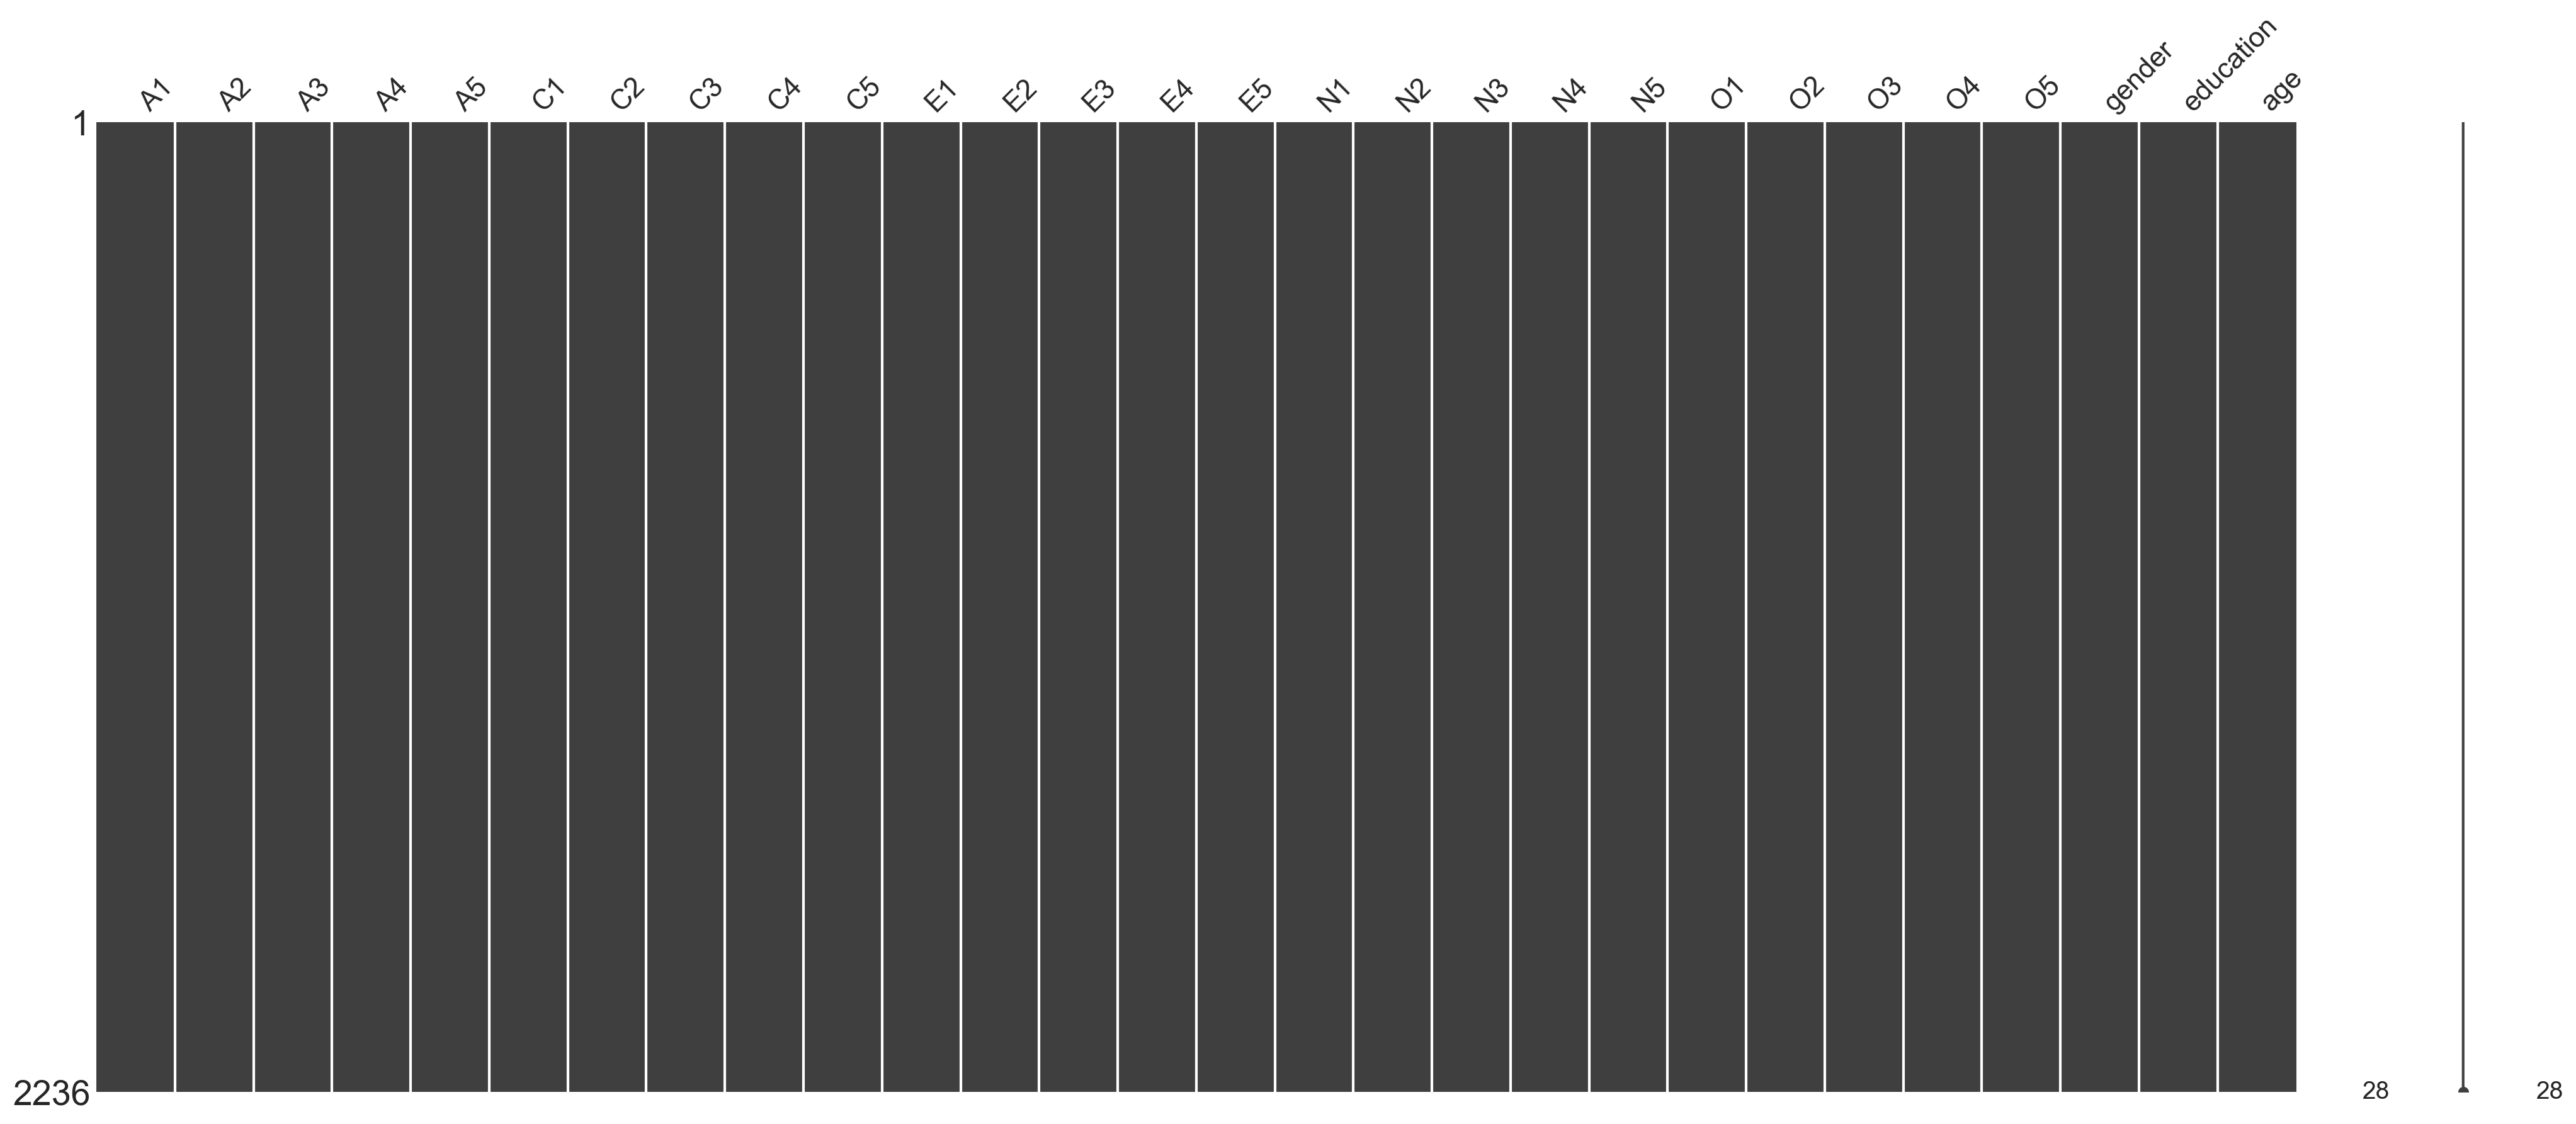

In [6]:
# Genere un nuevo objeto donde almacenará la base sin valores perdidos.
df = df.dropna()
msngo.matrix(df);

# Desafío 3: Descripción

In [7]:
# Separe en un nuevo objeto DataFrame la batería de preguntas a extraer.
personality_df = df.loc[:, 'A1':'O5']

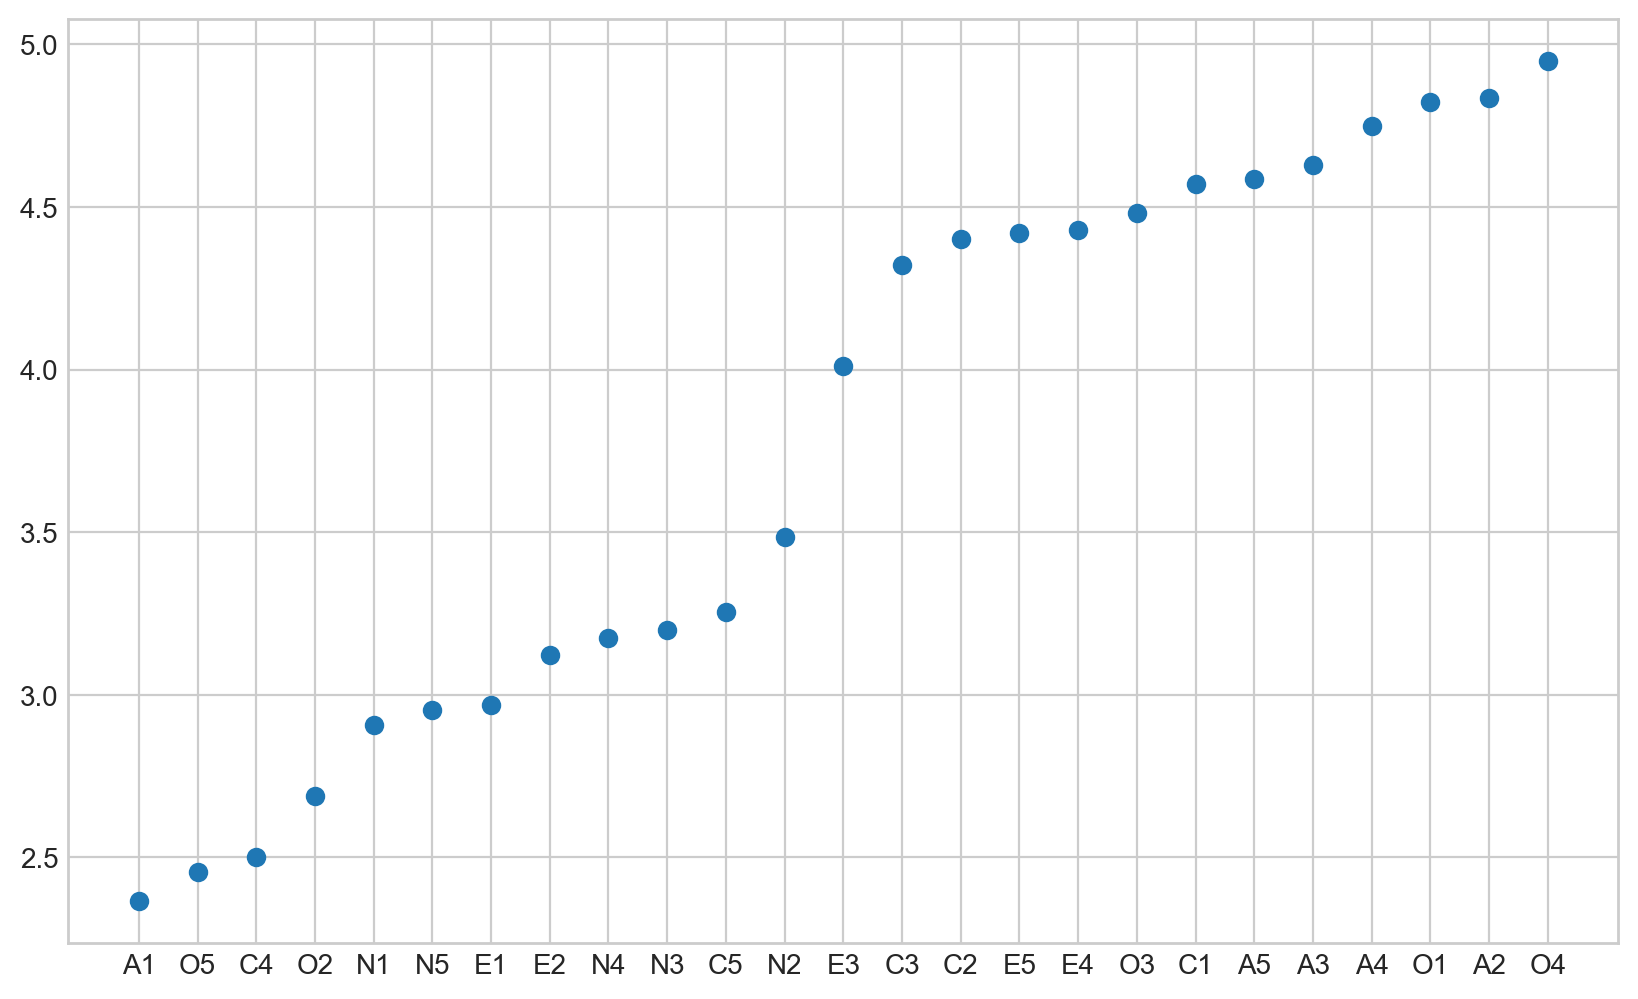

In [8]:
# Reporte las medias para cada una de las preguntas de la batería. Esto lo puede lograr con un dotplot.
plt.plot(personality_df.mean().sort_values(), "o")

<AxesSubplot:>

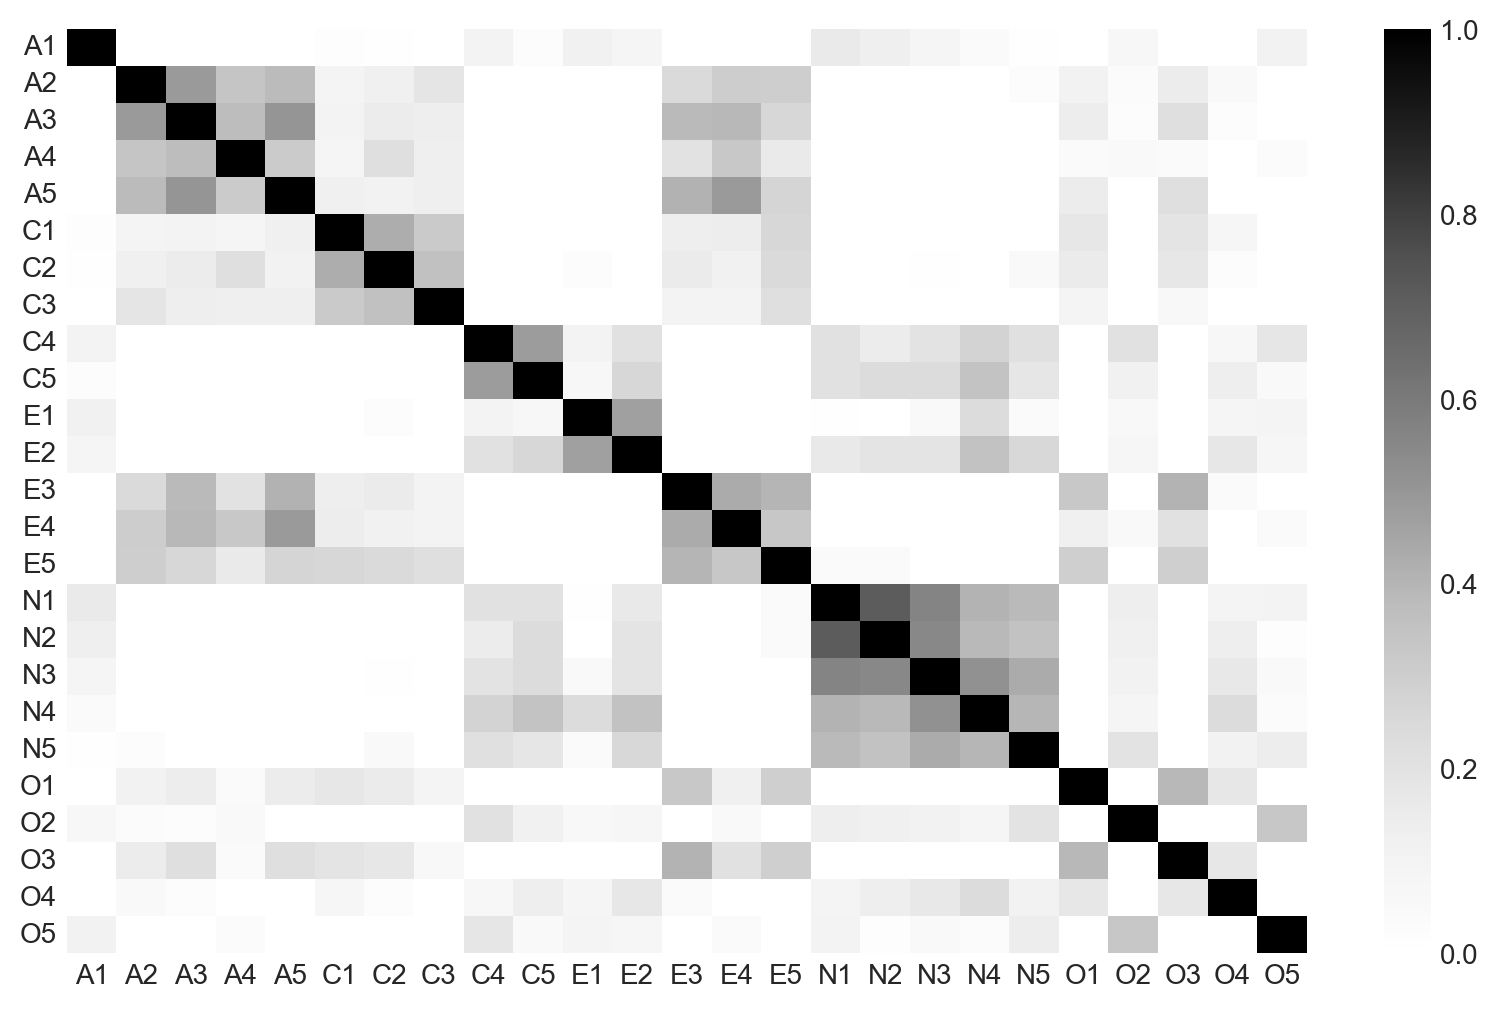

In [9]:
# Genere una matriz de correlaciones con este nuevo objeto. Visualízalo con heatmap. Comente sobre los principales patrones de correlación entre las preguntas de la batería.
personality_corrs_abs = personality_df.corr()
sns.heatmap(personality_corrs_abs, cmap='Greys', vmin=0.0, square=False)

# Desafío 4: Extracción de factores

In [10]:
# Antes de iniciar la extracción de factores, inspeccione la idoneidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esfericidad de Barlett y Kaiser-Meyer-Olkin. Comente los resultados.
fact.calculate_bartlett_sphericity(personality_df)

(16509.673550497202, 0.0)

In [11]:
fact.calculate_kmo(personality_df)

(array([0.73783211, 0.83426339, 0.87158082, 0.87042369, 0.90061871,
        0.83810325, 0.78841959, 0.84946345, 0.82364592, 0.86188771,
        0.84151427, 0.88389524, 0.89307072, 0.87818653, 0.89404239,
        0.7781268 , 0.77845262, 0.86005895, 0.88625489, 0.86049617,
        0.85501182, 0.78381059, 0.83374388, 0.78111794, 0.75804877]),
 0.8468295031833752)

In [12]:
# Instancie un objeto con FactorAnalyzer() donde se estimen 10 dimensiones latentes y no se aplique rotación.
personality_factor = fact.FactorAnalyzer(n_factors=6) 

In [13]:
personality_factor.fit(personality_df)

FactorAnalyzer(n_factors=6, rotation_kwargs={})

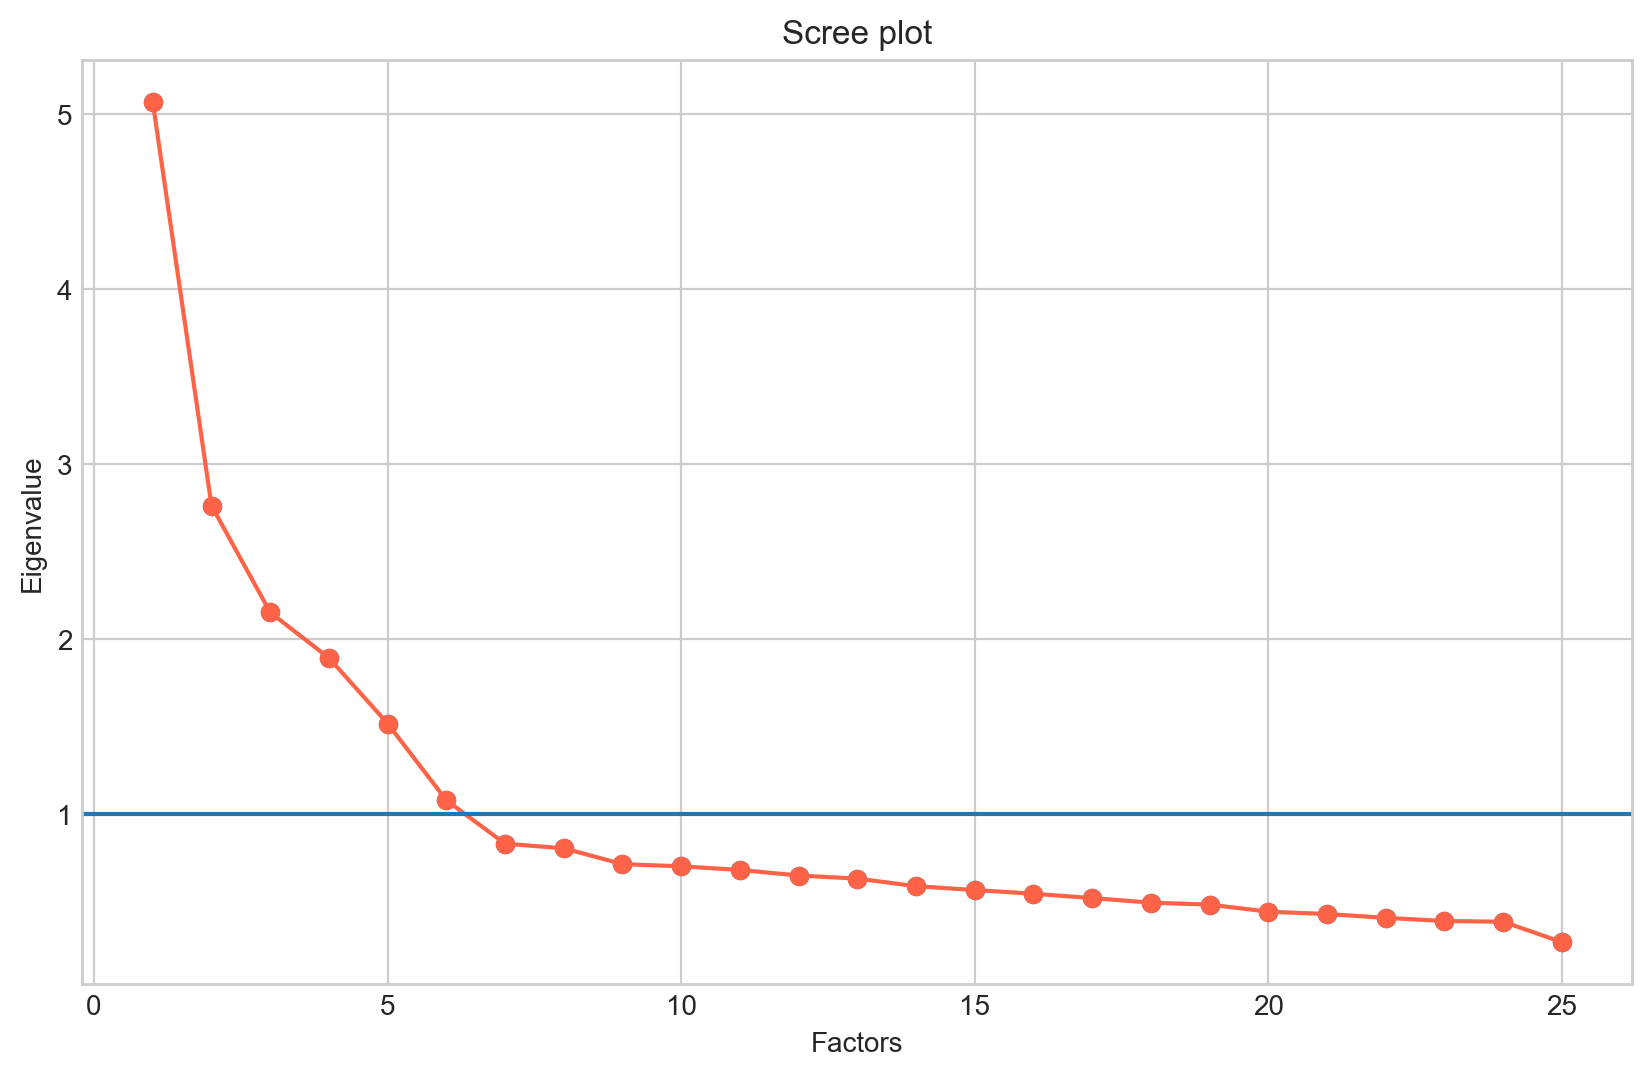

In [14]:
# Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.
personality_eigenvalues = personality_factor.get_eigenvalues()[0]

plt.scatter(range(1,personality_df.shape[1]+1),personality_eigenvalues)
plt.plot(range(1,personality_df.shape[1]+1), personality_eigenvalues,  'o-', color='tomato')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(1)
plt.title("Scree plot")
plt.show()

In [15]:
# Refactoriza el objeto con FactorAnalyzer() para incluir la cantidad de dimensiones válidas que informó el scree plot.
personality_loadings = personality_factor.loadings_
personality_loadings

array([[ 0.04424599,  0.08732614,  0.10630779,  0.14775216, -0.62321729,
         0.17473687],
       [ 0.11368602,  0.17964962,  0.05815394, -0.02598935,  0.63954146,
        -0.03974233],
       [ 0.00489421,  0.26906571,  0.02571255,  0.02073193,  0.48993031,
         0.18680318],
       [-0.04763319,  0.12925091,  0.19033621,  0.18247103,  0.32484374,
         0.06007357],
       [-0.16494203,  0.32359082, -0.01386535,  0.02980274,  0.3140843 ,
         0.28515062],
       [ 0.03532397, -0.04162308,  0.58879093, -0.13818821, -0.07677566,
        -0.00296578],
       [ 0.08136013, -0.12182411,  0.73784002, -0.01226394, -0.039509  ,
         0.03829778],
       [ 0.01570423, -0.07702098,  0.60828069,  0.05544249,  0.04390094,
        -0.10427803],
       [ 0.02590742,  0.02055363, -0.6717314 ,  0.11655467, -0.14057209,
         0.48014872],
       [ 0.15325314, -0.08739505, -0.55509591, -0.06515018, -0.00340265,
         0.236204  ],
       [-0.15842586, -0.6868344 ,  0.19816162,  0.

In [24]:
personality_loadings  = pd.DataFrame(data=personality_loadings)

In [35]:
# Extraiga las cargas λ del modelo e identifique qué ítems están asociados a cadafactor. Comente sobre qué significa cada factor construído.
personality_loadings_new = personality_loadings.applymap(lambda x: np.where(x < .4, ' ', round(x,2))) 
personality_loadings_new

,0,1,2,3,4,5
0,,,,,,
1,,,,,0.64,
2,,,,,0.49,
3,,,,,,
4,,,,,,
5,,,0.59,,,
6,,,0.74,,,
7,,,0.61,,,
8,,,,,,0.48
9,,,,,,


# Desafío 5: Modelación de factores

In [41]:
# Extraiga los puntajes del modelo factorial a su base de datos.
personality_scores = personality_factor.transform(personality_df)

In [37]:
personality_scores  = pd.DataFrame(data =personality_scores )

In [38]:
for colnames, serie in personality_scores.iteritems():
    df[str(colnames)] = serie

In [32]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,O5,gender,education,age,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,1.0,2,3.0,21,0.315536,0.993906,0.042770,-0.702357,0.906266,1.080599
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,3.0,1,2.0,19,1.648925,-1.045651,0.235251,-0.381872,0.609441,-0.380616
10,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,3.0,1,1.0,21,0.989915,0.614552,-0.324332,-0.291656,-0.131274,1.066310
14,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,5.0,1,1.0,17,-1.684845,-0.388209,0.160789,0.172256,0.570451,-0.048482
22,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,1,5.0,68,-0.827370,0.848704,-1.044507,0.391253,-1.162846,-0.213704


In [42]:
# Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al siguiente modelo estimable:
df.rename(columns = {'0':'Factor1','1':'Factor2','2':'Factor3','3':'Factor4', '4':'Factor5','5':'Factor6' }, inplace=True)

In [33]:
df['gender'] = df['gender'].replace([1, 2], [1, 0])

In [34]:
for i in df.loc[:, 'Factor1':'Factor6']: 
    print(i)
    print(smf.ols(i + "~ gender + education + age", df).fit().summary().tables[1])

Factor1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0317      0.083      0.384      0.701      -0.130       0.194
gender        -0.0158      0.047     -0.339      0.735      -0.107       0.076
education     -0.0067      0.020     -0.331      0.740      -0.046       0.033
age            0.0004      0.002      0.213      0.832      -0.004       0.005
Factor2
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0076      0.085      0.089      0.929      -0.159       0.174
gender        -0.0135      0.048     -0.282      0.778      -0.107       0.080
education     -0.0188      0.021     -0.907      0.364      -0.060       0.022
age            0.0016      0.002      0.747      0.455      -0.003       0.006
Factor3
                 coef    std